# Design and Plot Graphs in Python
## Mini-Lab: Categorical and Numerical Distributions

Welcome to your next mini-lab! Go ahead an run the following cell to get started. You can do that by clicking on the cell and then clickcing `Run` on the top bar. You can also just press `Shift` + `Enter` to run the cell.

In [1]:
from datascience import *
import numpy as np
import otter

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

grader = otter.Notebook("m4_l1_tests")

If you recall from the last module's mini-labs, we have some unfinished forest fire data to analyze. The code below will set up this table again so go ahead and run the next cell.

In [2]:
forestfires = Table.read_table("../datasets/forestfires.csv")
forestfires = forestfires.select("month", "temp", "wind", "rain", "area")

forestfires.show(3)

month,temp,wind,rain,area
mar,8.2,6.7,0,0
oct,18,0.9,0,0
oct,14.6,1.3,0,0


The first thing that any data scientist should do is analyze and clean the data. We already did some of that already by only selecting relevant columns but we'll still need to do some more cleaning. The following cell does that for you.

The following cell will change the `month`s from `string` data types into `int` data types so that we can more easily sort by time. This is done easily by using a python dictionary.

In [3]:
def month_to_int(month):
    conversion_dict = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    }
    return conversion_dict[month]

forestfires = forestfires.with_column("month int", forestfires.apply(month_to_int, "month"))
forestfires = forestfires.drop("month").relabel("month int", "month").move_to_start("month")

forestfires.show(3)

month,temp,wind,rain,area
3,8.2,6.7,0,0
10,18,0.9,0,0
10,14.6,1.3,0,0


Now with this data, generate a new table with one column representing the month (now as an `int`!) and with the average `temp`, `wind`, `rain`, and forest fire `area`s. This command can easily be done in one line.

*Note*: Remember `np.average` from the last lab? Use that!

In [4]:
average_fires = forestfires.group('month', np.average)
average_fires

month,temp average,wind average,rain average,area average
1,5.25,2,0,0
2,9.635,3.755,0,6.275
3,13.0833,4.96852,0.0037037,4.35667
4,12.0444,4.66667,0,8.89111
5,14.65,4.45,0,19.24
6,20.4941,4.13529,0,5.84118
7,22.1094,3.73438,0.00625,14.3697
8,21.6315,4.08641,0.0586957,12.4891
9,19.6122,3.55756,0,17.9426
10,17.0933,3.46,0,6.638


In [ ]:
grader.check("q1")

From here we have several ways of proceeding. Every table has a method for graphing its contents whether that's through a bar graph, a scatterplot, or a simple line plot. It's up to the data scientist to figure out the best way to display this data. Every plot and every graph has its own purpose and not every plot will fit with every situation. The next few cells are left empty to let you play around with these functions. The first cell will plot everything at once in a line plot using the `plot` method. There is also `barh`, and `scatter`. Play around and transform the data to figure out the best possible way to display the data!

*Note*: The x-axis is a required parameter in these method calls but the y-axis is not. Omitting this parameter will graph every other potential y-axis into one plot. To just show one y-axis, add another argument, like `average_fires.plot("month", "area average")`

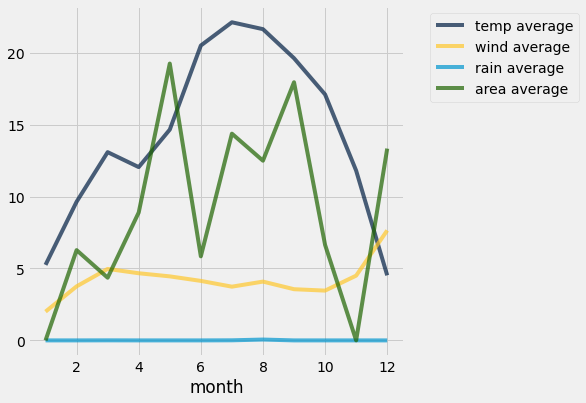

In [5]:
average_fires.plot("month")

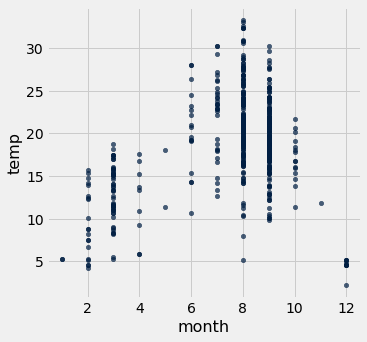

In [8]:
forestfires.select('month','temp').scatter('month','temp')

Congratulations on finishing! Run the next cell to make sure that you passed all of the test cases.

In [ ]:
grader.check_all()